In [11]:
#Importing all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import os #File operations
import cv2
import math

In [7]:
#Defining the data directory variable where all the images are stored
DATA_DIR = '../train/'

In [8]:
patient_ids=[]
for root,dirs,filenames in os.walk(DATA_DIR):
    patient_ids.extend(dirs)
print(len(patient_ids))

176


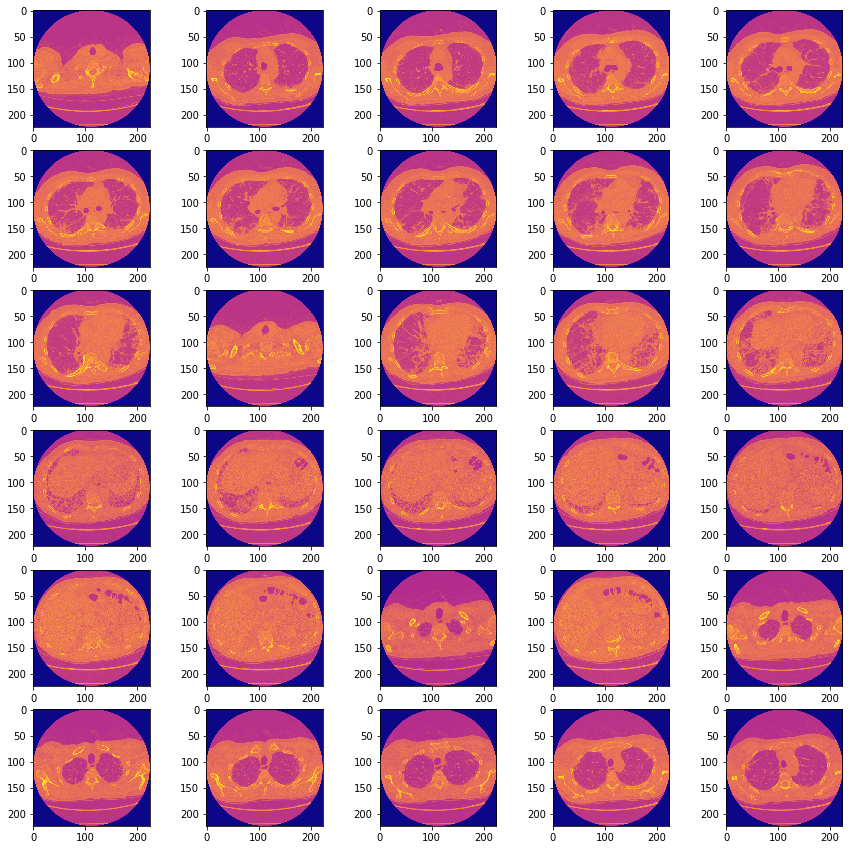

(512, 512)


In [32]:
BAD_ID = ['ID00011637202177653955184', 'ID00052637202186188008618'] #Bad Encoding
IMG_PX_SIZE = 224
for i in patient_ids[:1]:
    if i in BAD_ID:
        continue
    path = DATA_DIR + i
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    fig = plt.figure(figsize=(15,15))
    for num,each_slice in enumerate(slices):
        rows = math.floor(len(slices)//5)
        columns = 5
        if rows*columns < len(slices):
            rows = rows + 1
        y = fig.add_subplot(rows,columns,num+1)
        new_image = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        y.imshow(new_image,cmap='plasma')
    plt.show()
    print(np.array(each_slice.pixel_array).shape)
        

#### As we see not only the z-axis (depth) of the images is different but also the row and the columnar dimensions of the scans are different

In [56]:
#Let's resize the slices for consistency
HM_SLICES = 10
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def mean(l):
    return sum(l) / len(l)

for i in patient_ids[:10]:
    if i in BAD_ID:
        continue
    path = DATA_DIR + i
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    new_slices = []
    slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]
    chunk_sizes = math.ceil(len(slices) / HM_SLICES)
    if chunk_sizes == 0:
        chunk_sizes = chunk_sizes + 1
    print(chunk_sizes)
    for slice_chunk in chunks(slices, chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)
    print(len(slices),len(new_slices))


3
30 10
40
394 10
11
106 10
5
49 10
4
31 8
30
295 10
3
29 10
50
493 10
3
27 9
